In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= sns.load_dataset('iris')
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.groupby('species').size()

,0
species,
setosa,50
versicolor,50
virginica,50


In [8]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


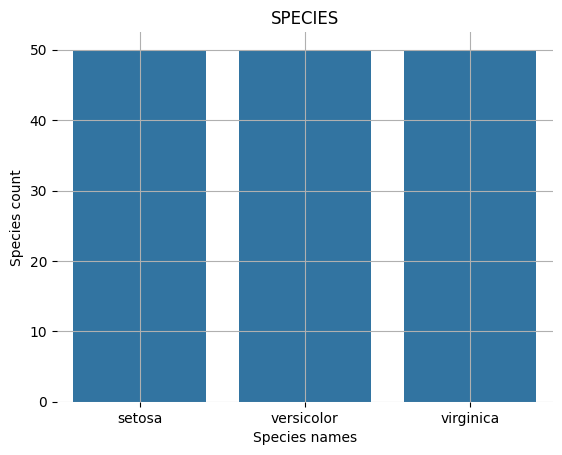

In [10]:
sns.countplot(data=data,x='species')
plt.title('SPECIES')
plt.ylabel('Species count')
plt.xlabel('Species names')
plt.grid(True)
plt.box(False)
plt.show()

<Axes: >

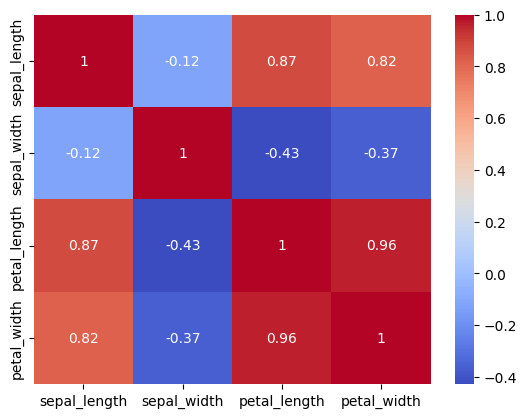

In [53]:
corr = data.drop('species', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Sepal Length vs Petal Length by Species')

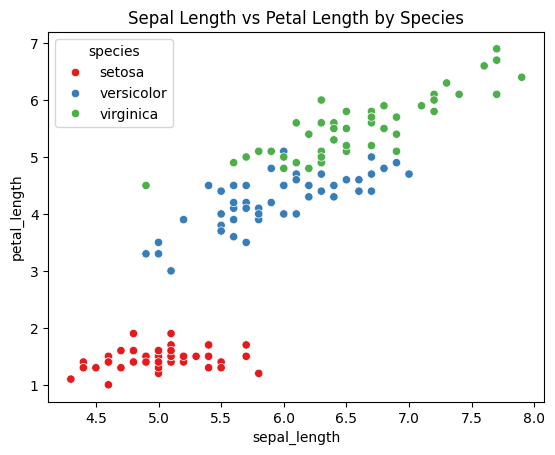

In [54]:
sns.scatterplot(data=data, x='sepal_length', y='petal_length', hue='species', palette='Set1')
plt.title("Sepal Length vs Petal Length by Species")

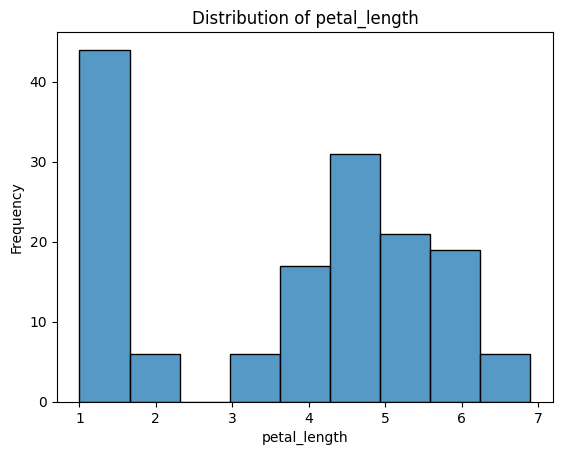

In [52]:
sns.histplot(data['petal_length'], kde=False)
plt.title('Distribution of petal_length')
plt.xlabel('petal_length')
plt.ylabel('Frequency')
plt.show()

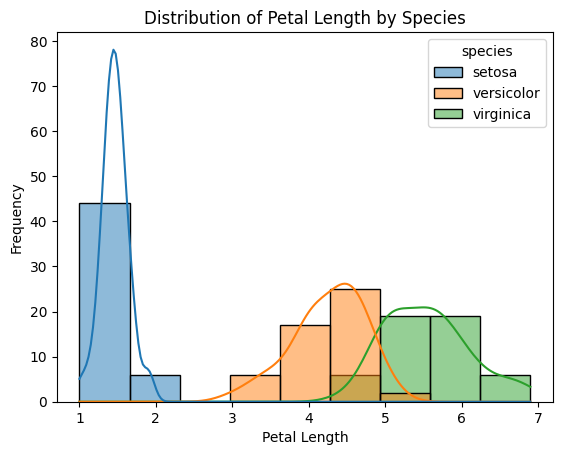

In [40]:
sns.histplot(data=data, x='petal_length', hue='species', kde=True)
plt.title('Distribution of Petal Length by Species')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.show()

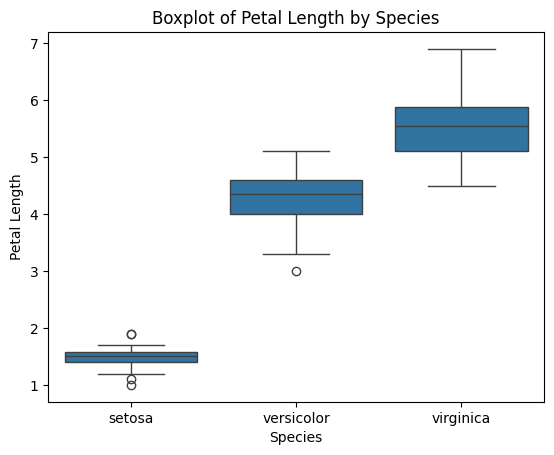

In [44]:
sns.boxplot(data=data, x='species', y='petal_length')
plt.title('Boxplot of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.show()

In [49]:
setosa = data[data['species'] == 'setosa']
Q1 = setosa['petal_length'].quantile(0.25)
Q3 = setosa['petal_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

setosa_clean = setosa[(setosa['petal_length'] >= lower_bound) & (setosa['petal_length'] <= upper_bound)]


In [50]:
print(f"Original dataset size: {setosa.shape[0]}")
print(f"Cleaned dataset size: {setosa_clean.shape[0]}")

Original dataset size: 50
Cleaned dataset size: 46


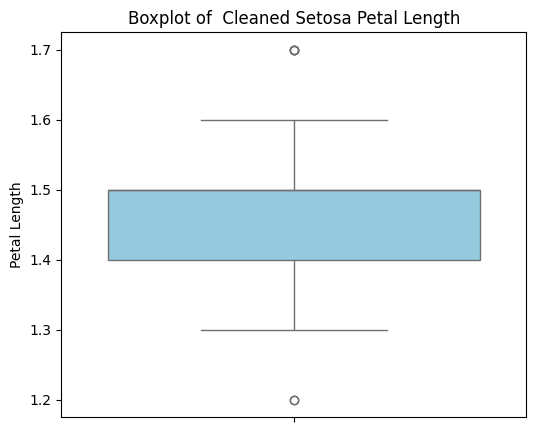

In [51]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=setosa_clean['petal_length'], color='skyblue')
plt.title("Boxplot of  Cleaned Setosa Petal Length")
plt.ylabel("Petal Length")
plt.show()

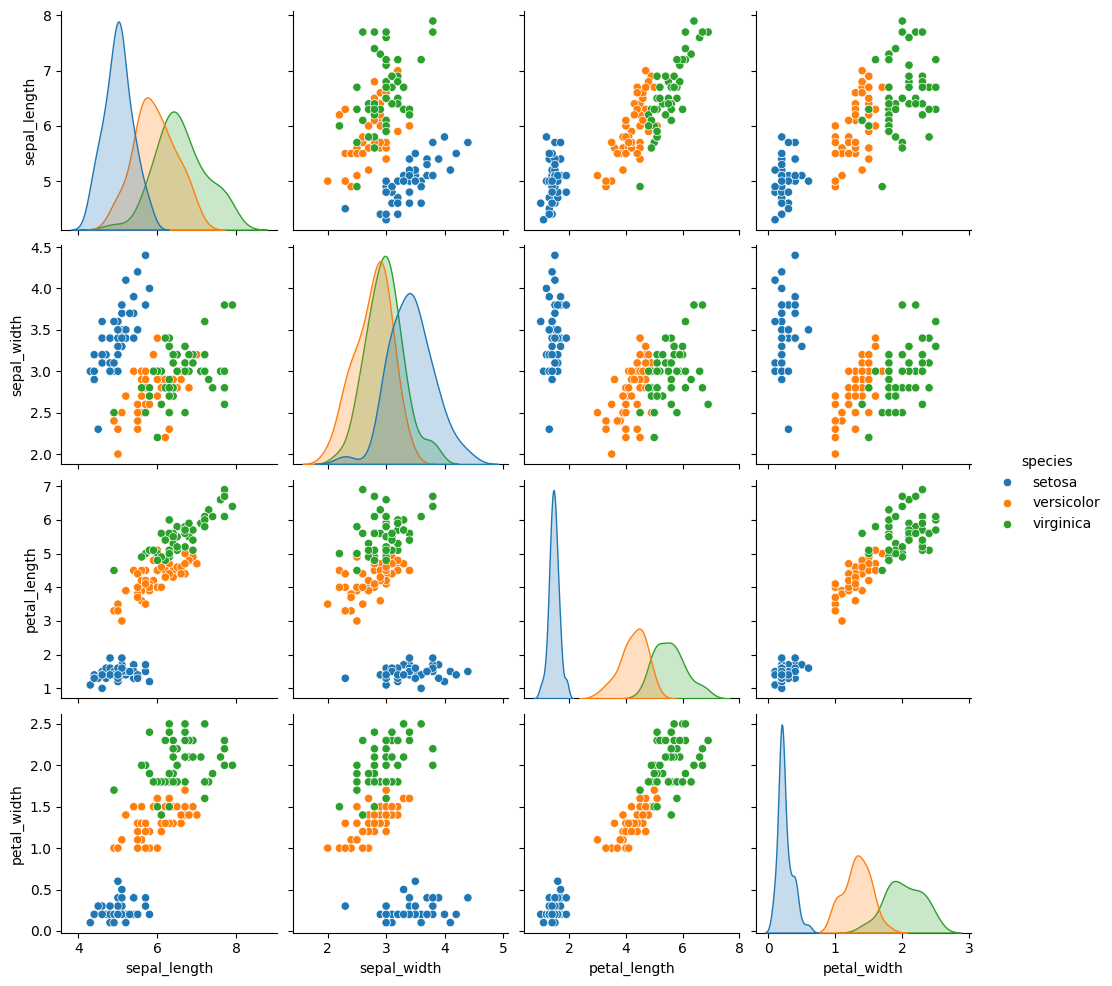

In [11]:
sns.pairplot(data, hue='species')